# Scipy: High-level scientific computing

The scipy package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

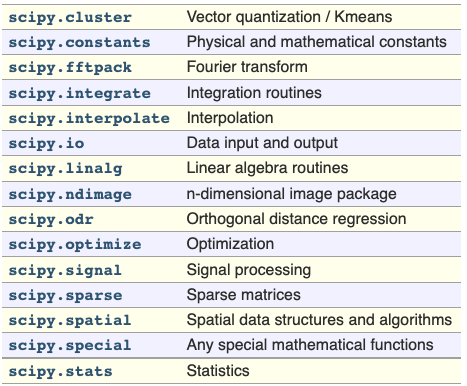

They all depends on `numpy`, but are mostly independent of each other.

## scipy.special

scipy.special package contains numerous functions of mathematical physics. It can deal with logarithmic and exponential, permutations an combinations, parabolic and exponential problems. It has functions for cube roots, lambert, beta, gamma and Bessel. All these functions follow the broadcasting and array looping regulations. 


In [6]:
from scipy import special

### Factorial

In [7]:
special.factorial(4)

24.0

### Permutations and combinations

Permutations of N things taken k at a time

In [11]:
# perm(N, k)
special.perm(6, 2)

30.0

Similarly we can find the number of combinations

In [12]:
special.comb(6, 2, repetition=True)

21.0

### Bessel Function

Bessel functions appear in wave propagation, signal processing, and static problems. Find the Bessel function of the first kind with:

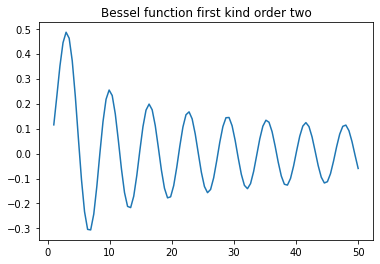

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 50, 100)
# Bessel function of the first kind order 2
jn1 = special.jn(2, x)

plt.plot(x, jn1)
plt.title('Bessel function first kind order two');

### Other scipy.special Functions

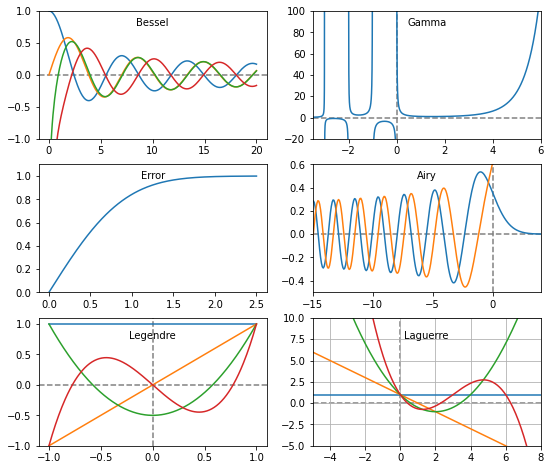

In [20]:
# create a figure window
fig = plt.figure(1, figsize=(9,8))

# create arrays for a few Bessel functions and plot them
x = np.linspace(0, 20, 256)
j0 = special.jn(0, x)
j1 = special.jn(1, x)
y0 = special.yn(0, x)
y1 = special.yn(1, x)
ax1 = fig.add_subplot(321)  # multiple plots: 3x2 , index 1
ax1.plot(x,j0, x,j1, x,y0, x,y1)
ax1.axhline(color="grey", ls="--", zorder=-1)
ax1.set_ylim(-1,1)
ax1.text(0.5, 0.95,'Bessel', ha='center', va='top',
     transform = ax1.transAxes)

# gamma function
x = np.linspace(-3.5, 6., 3601)
g = special.gamma(x)
g = np.ma.masked_outside(g, -100, 400)
ax2 = fig.add_subplot(322)  # multiple plots: 3x2 , index 2

ax2.plot(x,g)
ax2.set_xlim(-3.5, 6)
ax2.axhline(color="grey", ls="--", zorder=-1)
ax2.axvline(color="grey", ls="--", zorder=-1)
ax2.set_ylim(-20, 100)
ax2.text(0.5, 0.95,'Gamma', ha='center', va='top',
     transform = ax2.transAxes)

# error function
x = np.linspace(0, 2.5, 256)
ef = special.erf(x)
ax3 = fig.add_subplot(323)
ax3.plot(x,ef)
ax3.set_ylim(0,1.1)
ax3.text(0.5, 0.95,'Error', ha='center', va='top',
     transform = ax3.transAxes)

# Airy function
x = np.linspace(-15, 4, 256)
ai, aip, bi, bip = special.airy(x)
ax4 = fig.add_subplot(324)
ax4.plot(x,ai, x,bi)
ax4.axhline(color="grey", ls="--", zorder=-1)
ax4.axvline(color="grey", ls="--", zorder=-1)
ax4.set_xlim(-15,4)
ax4.set_ylim(-0.5,0.6)
ax4.text(0.5, 0.95,'Airy', ha='center', va='top',
     transform = ax4.transAxes)

# Legendre polynomials
x = np.linspace(-1, 1, 256)
lp0 = np.polyval(special.legendre(0),x)
lp1 = np.polyval(special.legendre(1),x)
lp2 = np.polyval(special.legendre(2),x)
lp3 = np.polyval(special.legendre(3),x)
ax5 = fig.add_subplot(325)
ax5.plot(x,lp0, x,lp1, x,lp2, x,lp3)
ax5.axhline(color="grey", ls="--", zorder=-1)
ax5.axvline(color="grey", ls="--", zorder=-1)
ax5.set_ylim(-1,1.1)
ax5.text(0.5, 0.9,'Legendre', ha='center', va='top',
     transform = ax5.transAxes)

# Laguerre polynomials
x = np.linspace(-5, 8, 256)
lg0 = np.polyval(special.laguerre(0),x)
lg1 = np.polyval(special.laguerre(1),x)
lg2 = np.polyval(special.laguerre(2),x)
lg3 = np.polyval(special.laguerre(3),x)
ax6 = fig.add_subplot(326)
ax6.plot(x,lg0, x,lg1, x,lg2, x,lg3)
ax6.axhline(color="grey", ls="--", zorder=-1)
ax6.axvline(color="grey", ls="--", zorder=-1)
ax6.set_xlim(-5,8)
ax6.set_ylim(-5,10)
ax6.text(0.5, 0.9,'Laguerre', ha='center', va='top',
     transform = ax6.transAxes)
plt.grid(True);

## Linear algebra operations: scipy.linalg

The `scipy.linalg` module provides standard linear algebra operations, relying on an underlying efficient implementation (BLAS, LAPACK).  

* The `scipy.linalg.det()` function computes the determinant of a square matrix:

In [21]:
from scipy import linalg

arr = np.array([[1, 2], [3, 4]])
linalg.det(arr)

-2.0

In [22]:
arr = np.array([[3, 2], [6, 4]])
linalg.det(arr)

0.0

* The `scipy.linalg.inv()` function computes the inverse of a square matrix:

In [23]:
arr = np.array([[1, 2], [3, 4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [27]:
rr = arr @ iarr
rr

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

In [28]:
np.allclose(rr, np.eye(2))

True

* More advanced operations are available, for example singular-value decomposition (SVD):

In [31]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

The resulting array spectrum is:

In [32]:
spec

array([14.88982544,  0.45294236,  0.29654967])

The original matrix can be re-composed by matrix multiplication of the outputs of `svd`:

In [33]:
sarr = np.diag(spec)
svd_mat = uarr @ sarr @ vharr
np.allclose(svd_mat, arr)

True

SVD is commonly used in statistics and signal processing. Many other standard decompositions (QR, LU, Cholesky, Schur), as well as solvers for linear systems, are available in `scipy.linalg`.